In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Função obejetiva utilizada para todas as regressões lineares a seguir, a qual visa calcular o erro quadrático da previsão feita

In [2]:
def objective_regression_function(theta, X, y):
    theta_0 = theta[0]
    theta_coeffs = theta[1:]
    
    y_pred = theta_0 + X @ theta_coeffs
    error  = y - y_pred
    sse    = np.sum(error**2)
    
    return sse

********* Univariate Regression ********* 

In [3]:
def univariate_regression(X, y):
    initial_theta = np.array([0.0, 0.0])

    result = minimize(objective_regression_function, initial_theta, args=(X, y), method='Nelder-Mead')

    return result

In [4]:
def plot_univariate_regression(X, y, result):
    theta_0, theta_1 = result.x

    print("--- Optimization Results ---")
    print(f"The optimization was successful: {result.success}")
    print(f"Optimal theta_0: {theta_0:.4f}")
    print(f"Optimal theta_1: {theta_1:.4f}")
    print(f"Final SSE: {result.fun:.4f}")

    print(f"\nModel: y = {theta_0:.2f} + {theta_1:.2f}*x1")

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='red', label='Observed Data Points')

    x_line = np.linspace(min(X), max(X), 100)
    y_line = theta_0 + theta_1 * x_line
    plt.plot(x_line, y_line, color='blue', label=f'Fitted Line: y = {theta_0:.2f} + {theta_1:.2f}x')

    plt.title('Univariate Linear Regression')
    plt.xlabel('$x_i$')
    plt.ylabel('$y_i$')
    plt.legend()
    plt.grid(True)
    plt.show()

--- Optimization Results ---
The optimization was successful: True
Optimal theta_0: 1.1500
Optimal theta_1: 0.8300
Final SSE: 0.0030

Model: y = 1.15 + 0.83*x1


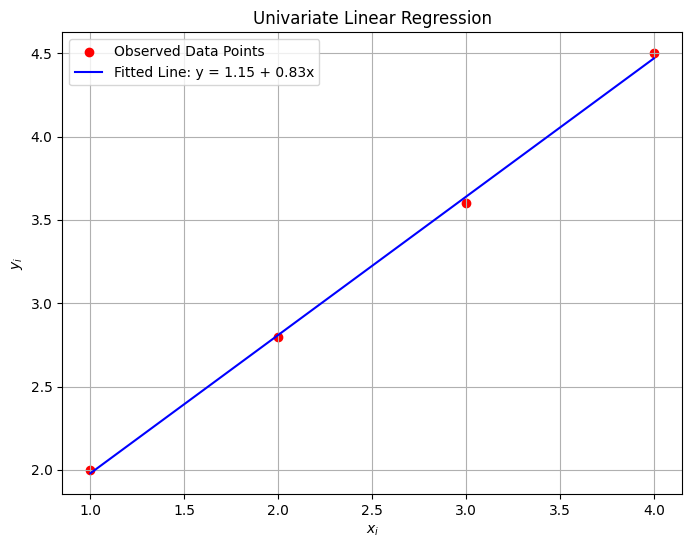

In [5]:
X = np.array([[1.0], [2.0], [3.0], [4.0]])
y = np.array([2.0, 2.8, 3.6, 4.5])

result = univariate_regression(X, y)
plot_univariate_regression(X, y, result)

A função foi corretamente deduzida com o menor erro quadrático para uma curva linear. 

********* Bivariate Regression ********* 

In [6]:
def bivariate_regression(X, y):
    initial_theta = np.array([0.0, 0.0, 0.0])
    result = minimize(objective_regression_function, initial_theta, args=(X, y), method='Nelder-Mead')

    return result


In [7]:
def print_bivariate_regression(result):
    theta_0, theta_1, theta_2 = result.x
    
    print("--- Standard Bivariate Model Results (with theta_2) ---")
    print(f"Optimal theta_0: {theta_0:.4f}")
    print(f"Optimal theta_1: {theta_1:.4f}")
    print(f"Optimal theta_2: {theta_2:.4f}")
    print(f"Final SSE: {result.fun:.4f}")
    print(f"\nModel: y = {theta_0:.2f} + {theta_1:.2f}*x1 + {theta_2:.2f}*x2")

In [8]:
X = np.array([
    [1.0, 2.0],
    [2.0, 1.0],
    [3.0, 4.0],
    [4.0, 3.0]
])
y = np.array([2.1, 2.5, 4.9, 5.1])

result = bivariate_regression(X, y)
print_bivariate_regression(result)


--- Standard Bivariate Model Results (with theta_2) ---
Optimal theta_0: 0.2750
Optimal theta_1: 0.8250
Optimal theta_2: 0.5250
Final SSE: 0.0100

Model: y = 0.27 + 0.82*x1 + 0.53*x2


A função foi corretamente deduzida com o menor erro quadrático para uma curva linear multivariada. 

********* Ridge Regression ********* 

In [9]:
def objective_ridge(theta, X, y, lambda_val):
    theta_coeffs = theta[1:]
    sse          =  objective_regression_function(theta, X, y)
    l2_penalty   = lambda_val * np.sum(theta_coeffs**2)
    
    return sse + l2_penalty

In [10]:
def ridge_regression(X, y, lambda_val):
    initial_theta = np.array([0.0, 0.0, 0.0])

    result = minimize(objective_ridge, initial_theta, args=(X, y, lambda_val), method='BFGS')

    return result    

In [11]:
def print_ridge_regression(result, lambda_val):
    theta_opt_ridge = result.x

    print(f"--- Ridge Regression Results (lambda = {lambda_val}) ---")
    print(f"Optimal theta_0: {theta_opt_ridge[0]:.4f}")
    print(f"Optimal theta_1: {theta_opt_ridge[1]:.4f}")
    print(f"Optimal theta_2: {theta_opt_ridge[2]:.4f}")
    print(f"\nModel: y = {theta_opt_ridge[0]:.2f} + {theta_opt_ridge[1]:.2f}*x1 + {theta_opt_ridge[2]:.2f}*x2")

In [12]:
X = np.array([
    [1.0, 2.0],
    [2.0, 1.0],
    [3.0, 4.0],
    [4.0, 3.0]
])
y = np.array([2.1, 2.5, 4.9, 5.1])

lambda_val    = 1.0 

result = ridge_regression(X, y, lambda_val)
print_ridge_regression(result, lambda_val)

--- Ridge Regression Results (lambda = 1.0) ---
Optimal theta_0: 0.6500
Optimal theta_1: 0.7000
Optimal theta_2: 0.5000

Model: y = 0.65 + 0.70*x1 + 0.50*x2


A função foi corretamente deduzida, porém com valores de coeficientes menores do que aqueles dados pela regressão bivariada